# Clone Project Folder From GitHub

In [1]:
!git clone https://github.com/data-analytics-professionals/tweet-classification.git

fatal: destination path 'tweet-classification' already exists and is not an empty directory.


# Install Required Libraries

In [2]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-i0ekrfy3
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-i0ekrfy3
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp36-none-any.whl size=11742 sha256=eb306be57b6999709675bee860146a16a945e974b5f3c3d51097e6a91e0332ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-wa19uusy/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie
  Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [3]:
!pip install spacy==2.2.3

In [4]:
!python -m spacy download en_core_web_sm


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [5]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [6]:
!pip install beautifulsoup4==4.9.1


In [7]:
!pip install textblob==0.15.3

# Load All Necessary Libraries

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import preprocess_kgptalkie as kgp
import re
import spacy
import en_core_web_lg 

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [9]:
# Set seaborn settings
sns.set(rc={'figure.figsize':(20, 5)})
sns.set_theme(context='notebook', style='dark', palette='bright', font='sans-serif', font_scale=1, color_codes=True, rc=None)
# %matplotlib inline


# Data Acquisition

In [10]:
# create pipeline with train.csv and store result in df
df = pd.read_csv("/content/tweet-classification/data/train.csv")

# Data Exploration

In [11]:
# check data within df
df.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [12]:
# check shape of df
df.shape

(7613, 5)

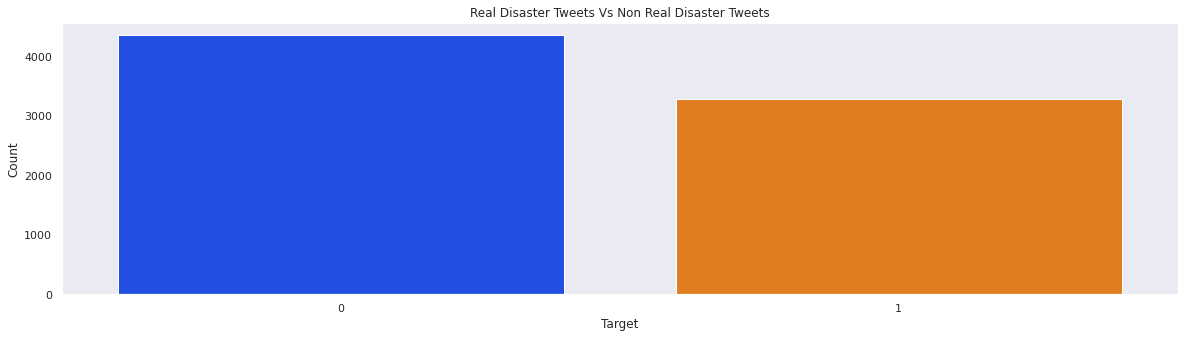

In [13]:
# Plot Count: Real Disaster Tweets Vs Non Real Disaster Tweets
sns.countplot(x='target', data=df)
plt.title('Real Disaster Tweets Vs Non Real Disaster Tweets')
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()

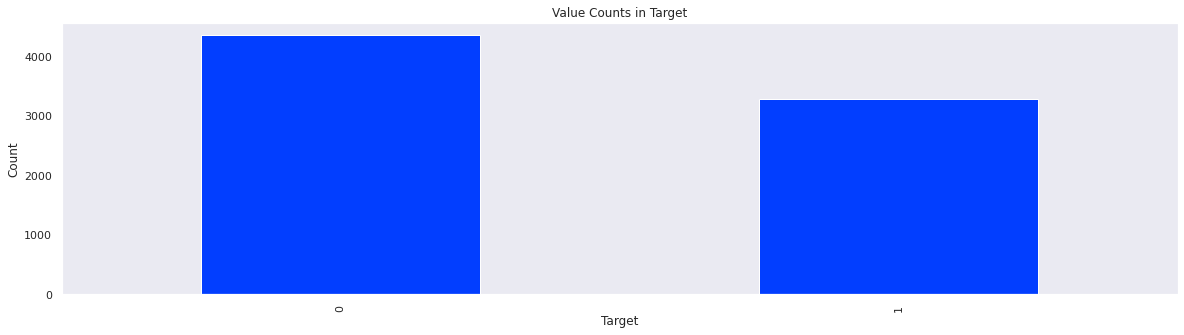

In [14]:
# Return counts of unique values within target feature.
df['target'].value_counts().plot.bar()
plt.title('Value Counts in Target')
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()

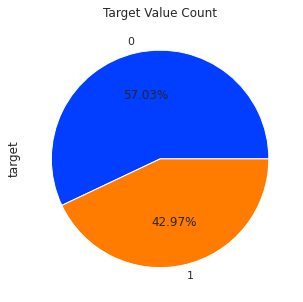

In [15]:
# Generate a pie plot for target feature.
df['target'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Target Value Count')
plt.show()

### Distribution in Tweets 


In [16]:
# Useful agregations from tweets 
df = kgp.get_basic_features(df)
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


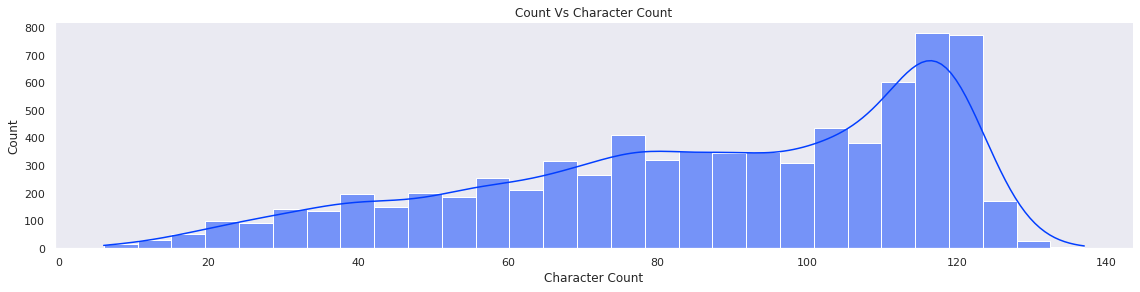

In [17]:
# Plot density distribution of a char_counts feature
sns.displot(df['char_counts'], height=4, aspect=4, kde=True)
plt.title('Count Vs Character Count')
plt.ylabel('Count')
plt.xlabel('Character Count')
plt.show()

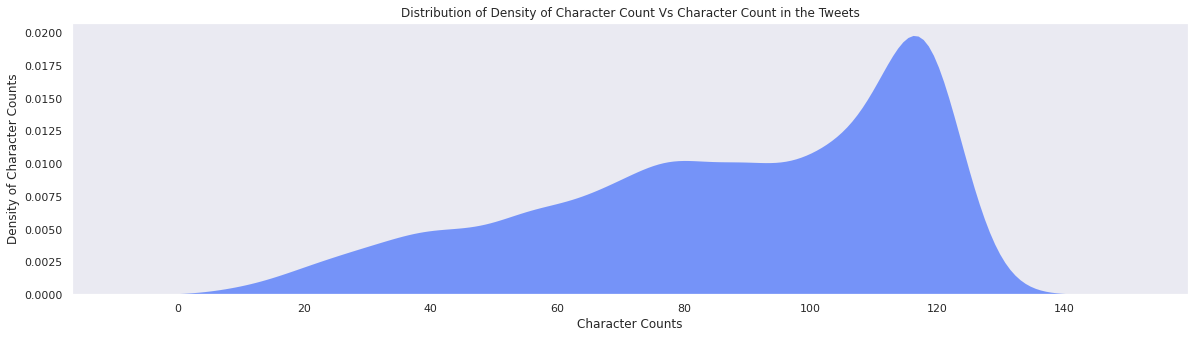

In [18]:
# Plot Kernel Density Estimate (KDE) Plot for char_counts
sns.kdeplot(df['char_counts'], shade=True, fill=True, alpha=.5, linewidth=0)
plt.title('Distribution of Density of Character Count Vs Character Count in the Tweets')
plt.ylabel('Density of Character Counts')
plt.xlabel('Character Counts')
plt.show()

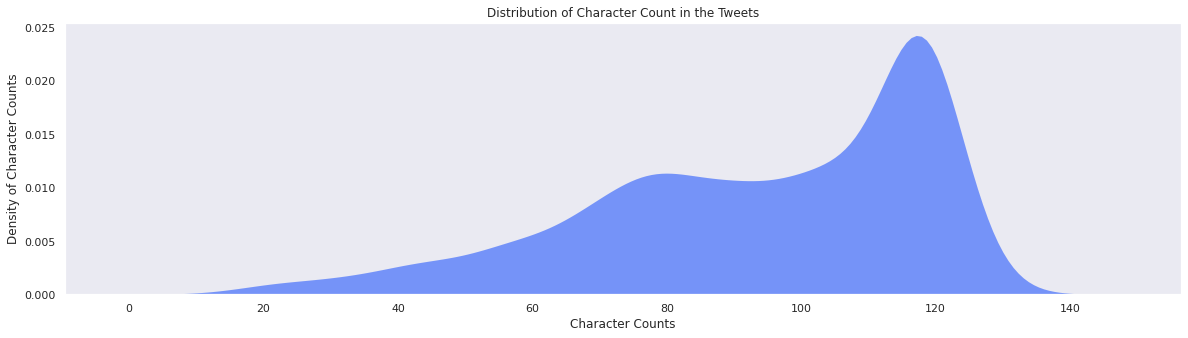

In [19]:
# Plot: Kernel Density Estimate (KDE) Plot for char_counts where target == 1
sns.kdeplot(df[df['target'] == 1]['char_counts'], shade=True, fill=True, alpha=.5, linewidth=0)
plt.title('Distribution of Character Count in the Tweets')
plt.ylabel('Density of Character Counts')
plt.xlabel('Character Counts')
plt.show()

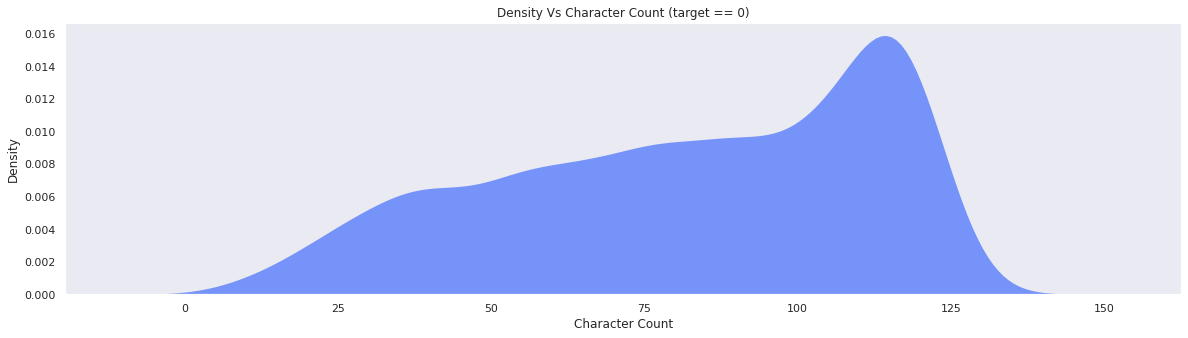

In [20]:
# Plot: Kernel Density Estimate (KDE) Plot for char_counts where target == 0
sns.kdeplot(df[df['target'] == 0]['char_counts'], shade=True, fill=True, alpha=.5, linewidth=0)
plt.title('Density Vs Character Count (target == 0)')
plt.ylabel('Density')
plt.xlabel('Character Count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


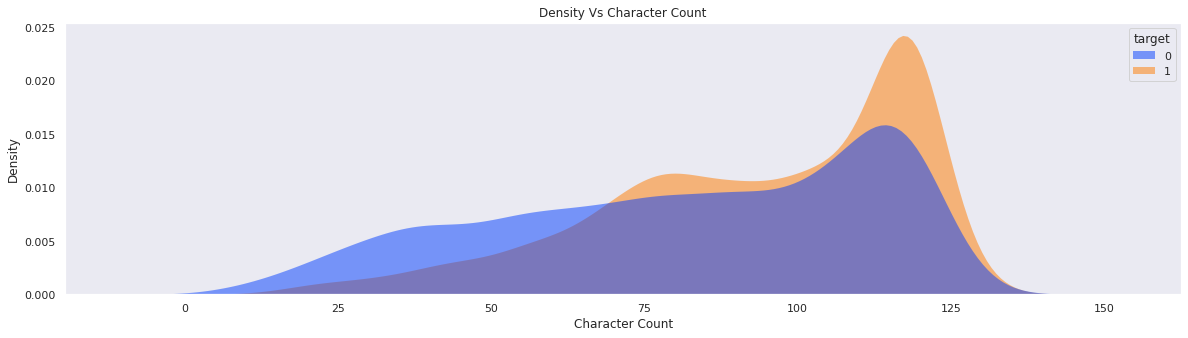

In [21]:
# Kernel Density Estimate (KDE) Plot for char_counts where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['char_counts'], shade=True, color='red', hue=df['target'], fill=True, alpha=.5, linewidth=0)
sns.kdeplot(df[df['target'] == 0]['char_counts'], shade=True, color='blue', hue=df['target'], fill=True, alpha=.5, linewidth=0)
plt.title('Density Vs Character Count')
plt.ylabel('Density')
plt.xlabel('Character Count')
plt.show()

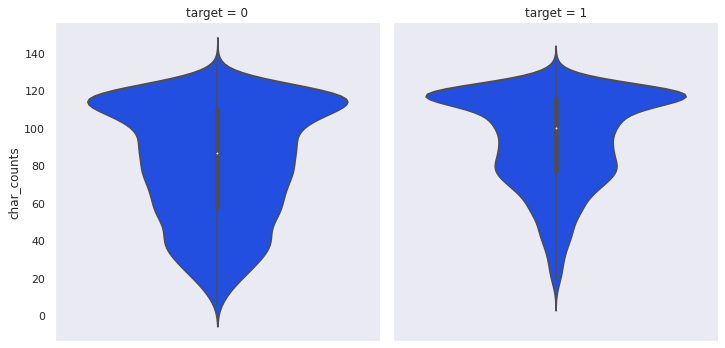

In [22]:
# Plot catplot
sns.catplot(y='char_counts', data=df, kind='violin', col='target')
plt.show()

### Number of Words, Average Words Length, and Stop Words Distribution in Tweets

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


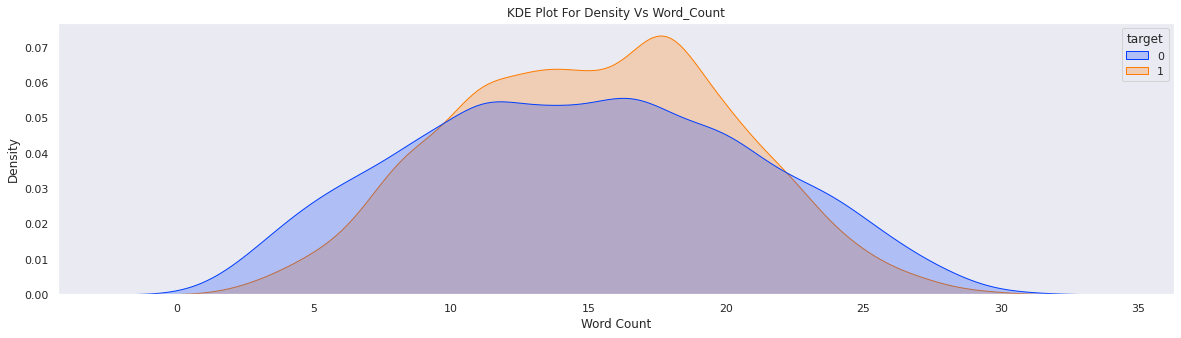

In [23]:
# Plot: Kernel Density Estimate (KDE) Plot for word_counts where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['word_counts'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['word_counts'], shade=True, color='blue', hue=df['target'])
plt.title('KDE Plot For Density Vs Word_Count')
plt.ylabel('Density')
plt.xlabel('Word Count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


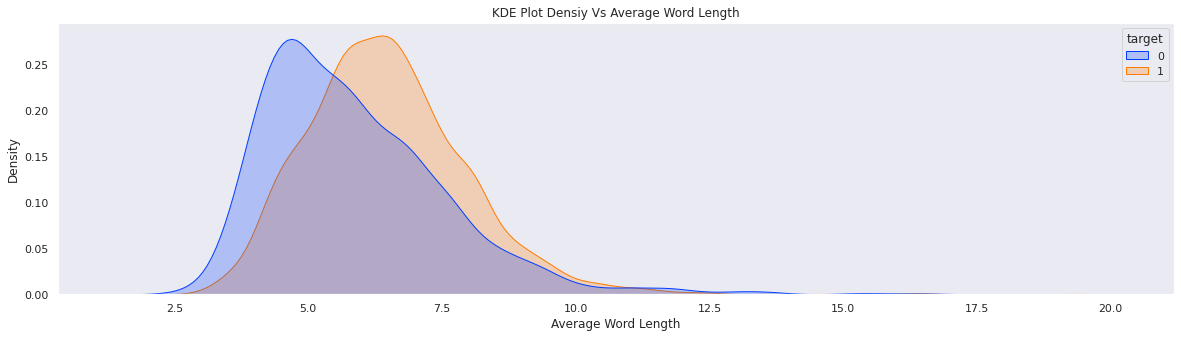

In [24]:
# Plot: Kernel Density Estimate (KDE) Plot for avg_wordlength where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['avg_wordlength'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['avg_wordlength'], shade=True, color='blue', hue=df['target'])
plt.title('KDE Plot Densiy Vs Average Word Length')
plt.ylabel('Density')
plt.xlabel('Average Word Length')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


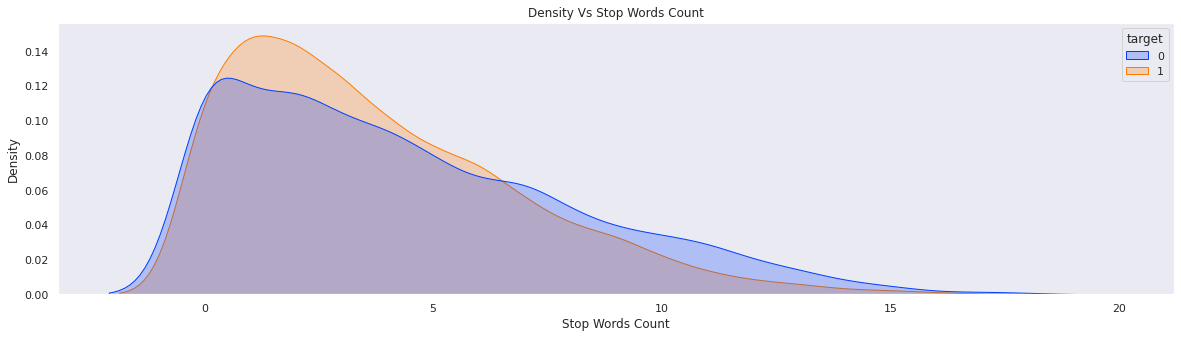

In [25]:
# PLot: Kernel Density Estimate (KDE) Plot for stopwords_counts_count where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['stopwords_counts'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['stopwords_counts'], shade=True, color='blue', hue=df['target'])
plt.title('Density Vs Stop Words Count')
plt.ylabel('Density')
plt.xlabel('Stop Words Count')
plt.show()

# Data Exploration with N-Grams

### Frequency of Words (unigram)

In [26]:
# frequency of Words (unigram)
unigram_freq = kgp.get_word_freqs(df=df, col='text')
unigram_freq.shape

(31924,)

### Common Top 20 Unigram (one word)

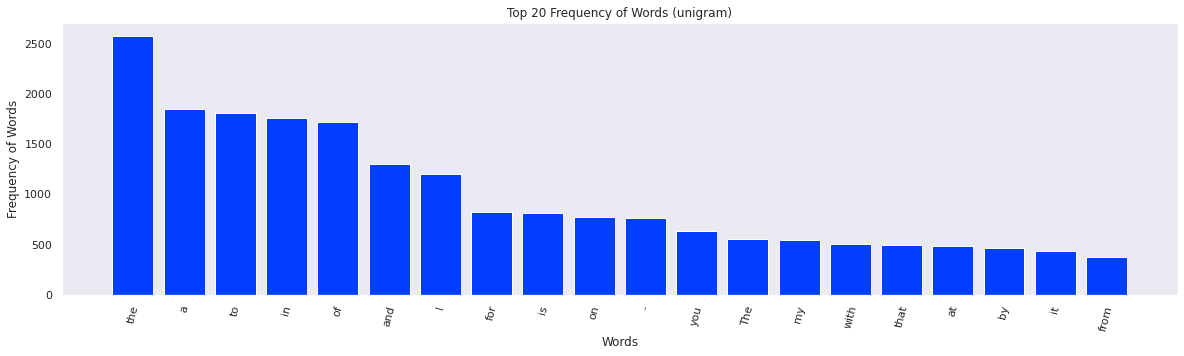

In [27]:
# 20 Top Words (unigram)
top_20_unigram_freq = unigram_freq[:20]

# Plot top_20_unigram_freq Index Vs top_20_unigram_freq Values
plt.bar(top_20_unigram_freq.index, top_20_unigram_freq.values)
plt.xticks(rotation = 75)
plt.title("Top 20 Frequency of Words (unigram)")
plt.ylabel('Frequency of Words')
plt.xlabel('Words')
plt.show()

### Unigram (one word) - Least Used Common Words (Last 20 Words in the unigram_freqs)

In [28]:
# Last 20 Words in the unigram_freqs (unigram)
least_20_unigram_freq = unigram_freq[-20:]
least_20_unigram_freq

SpaceshipTwo              1
bang...in                 1
monologue                 1
convinced                 1
bruh?                     1
@AceBreakingNews          1
constitute                1
wait!                     1
17-Jul-2015               1
astrologian...            1
Jez                       1
KingÛªs                  1
Shemesh;                  1
narrowly                  1
.@APHL                    1
FUN':                     1
Hawk)!His                 1
providers                 1
kids!!!!!                 1
http://t.co/DdUxtHvVnr    1
dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


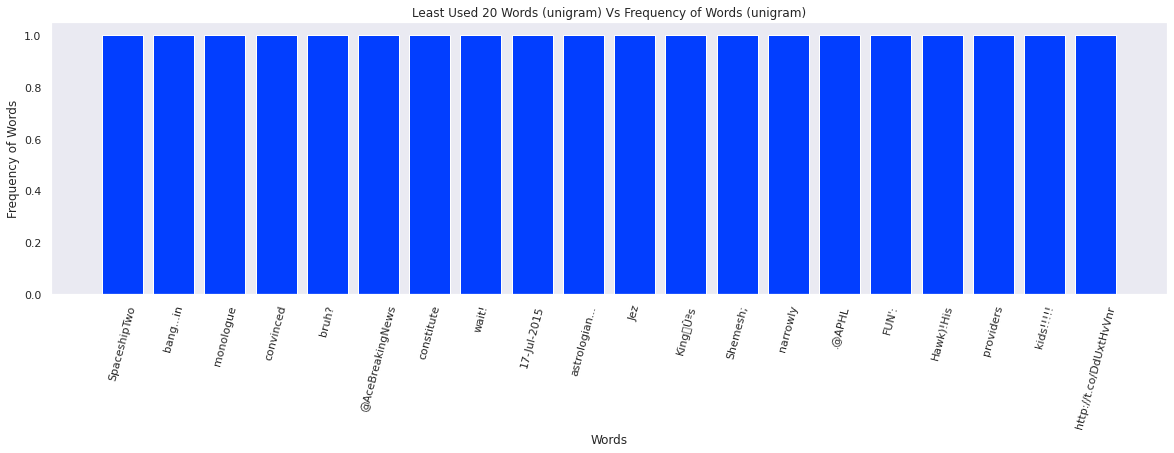

In [29]:
# Plot least_20_unigram_freq Index Vs least_20_freq_unigram_words Values
plt.bar(least_20_unigram_freq.index, least_20_unigram_freq.values)
plt.xticks(rotation = 75)
plt.title("Least Used 20 Words (unigram) Vs Frequency of Words (unigram)")
plt.ylabel('Frequency of Words')
plt.xlabel('Words')
plt.show()

### Bi-gram Tweet Analysis

In [30]:
bi_gram_freq = kgp.get_ngram(df=df, col='text', ngram_range=2)

# Common Top 20 Bi-gram (two words)
top_20_bi_gram_freq = bi_gram_freq[:20]
top_20_bi_gram_freq

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491),
 ('ûó wallybaiter', 68490),
 ('ûó the', 68489),
 ('ûó stories', 68488),
 ('ûó rt', 68487),
 ('ûó richmond', 68486),
 ('ûó organizers', 68485),
 ('ûó oh', 68484),
 ('ûó now', 68483),
 ('ûó lol', 68482),
 ('ûó integrates', 68481),
 ('ûó https', 68480),
 ('ûó hiroshima', 68479),
 ('ûó head', 68478),
 ('ûó eh', 68477),
 ('ûó desolation', 68476)]

# Data Cleaning

In [31]:
# Function to clean tweets data
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ').replace('.', ' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [32]:
df['text'] = df['text'].apply(lambda x: get_clean(x))
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0


# Tweet Visualisation - Real Disaster Tweets

In [33]:
real_disaster_tweets = kgp.get_word_freqs(df=df[df["target"]==1], col="text")
real_disaster_tweets = " ".join(real_disaster_tweets.index)
real_disaster_tweets

'httpt the in of a to and is on for i at by from it that with not you after this fire was are as have my news httpst over up more via an disaster were be people california suicide has no police who but when been killed like do will 2 just hiroshima than so out fires storm crash families we train now about into emergency s your buildings bomb there all two mh370 what attack am they nuclear wildfire video accident get one bombing new burning prime minister northern how dead legionnaires me bomber some if homes war car still atomic obama he fatal years off collapse may forest us debris retweet city watch today malaysia first 1 japan mass or man latest near severe water had earthquake confirmed those before found oil would world army 70 down floods spill home warning under wreckage derailment 3 4 could weather injured outbreak evacuation 40 being saudi thunderstorm migrants old our investigators flooding missing during say flood can bridge time their state her back death mosque suspect cha

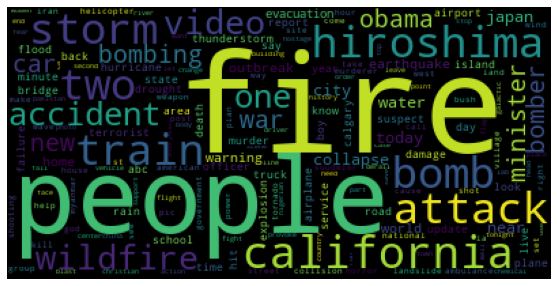

In [34]:
# Create WordCloud instance word_cloud
word_cloud = WordCloud(max_font_size=100)

# Generate word cloud
word_cloud.generate(real_disaster_tweets)

# Plot Words
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Tweet Visualisation - Not Real Disaster Tweets

In [35]:
not_real_disaster_tweets = kgp.get_word_freqs(df=df[df["target"] == 0], col="text")
not_real_disaster_tweets = " ".join(not_real_disaster_tweets.index)
not_real_disaster_tweets

'the httpt i a to and of is in you my it for not on that with this have be am httpst are do me out your like so by at just was but will up all he if from new as get they has we or no when now about what would an how one can there body people 2 via been her video into his more loud us know love back time why got off them emergency full see after who day youtube going cannot 3 did still fire some good let go she think laughing had want man ass our should world over retweet then life way their first youre work too last burning really only need make than news god because many being much best here even take content help could right 5 wreck say him were feel great black its today hot please fucking 4 im never every look 1 down fear cross ever read before bags fuck does oh night top these bag reddit without come any year getting another everyone liked panic shit head death may bloody screaming ruin smoke wrecked bad u always explode school w face coming most well harm crash buildings disaster

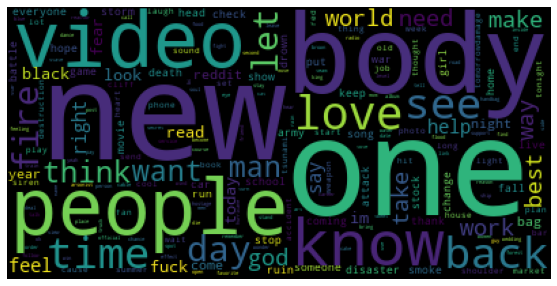

In [36]:
# Create WordCloud instance word_cloud
word_cloud = WordCloud(max_font_size=100)

# Generate word_cloud 
word_cloud.generate(not_real_disaster_tweets)

# Plot Words
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Classification with TFIDF and Linear Support Vector Classification (LinearSVC).

In [37]:
# Store text from df into text variable
text = df['text']

# store target in y variable
y = df['target']

In [38]:
# create an instance of TfidfVectorizer(), vectorizer
vectorizer = TfidfVectorizer()

# Convert text to a matrix of TF-IDF features (X).
X = vectorizer.fit_transform(text)

In [39]:
# Type of X
type(X)

scipy.sparse.csr.csr_matrix

In [40]:
# Get shape of X
print(X.shape)

(7613, 22546)


In [41]:
print(vectorizer.get_feature_names()[0:11])


['00', '0011', '0016', '0025', '005225', '00end', '01', '010156', '010217', '0104', '010401']


In [42]:
# Split  X and y  into random train and test subsets, (X_train, y_train, X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [43]:
# Create function run_SVM to train and predict and print classification_report
def run_svm(clf, X_train, X_test, y_train, y_test):

  # train instance of SVM (clf)
  clf.fit(X_train, y_train)

  #  Use trained clf to predict on X_test
  y_pred = clf.predict(X_test)

  print()

  # print classification report
  print ('Classification Report')
  print(classification_report(y_test, y_pred))

In [44]:
# create an instance of LinearSVC as clf
clf = LinearSVC ()

# train the clf using run_svm
run_svm(clf, X_train, X_test, y_train, y_test)  


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1303
           1       0.79      0.68      0.73       981

    accuracy                           0.79      2284
   macro avg       0.79      0.77      0.78      2284
weighted avg       0.79      0.79      0.78      2284



# Classification with Word2Vec and SVM

In [45]:
# create nlp object using load method from en_core_web_lg
nlp = en_core_web_lg.load()

In [46]:
# create function get_vector
def get_vec(x):
  doc=nlp(x)
  vec = doc.vector
  return vec

In [47]:
# create a vector feature using get_vec function
df['vec'] = df['text'].apply(lambda x: get_vec(x))

In [48]:
# quick check of df
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.26623327, 0.05843069, -0.1404636, -0.05265..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.014817425, -0.09212343, -0.10716944, -0.33..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[0.0059339865, 0.016337818, -0.105279535, -0.0..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-0.13400537, 0.25267026, 0.09032763, -0.16645..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.06394094, -0.01423019, 0.0063574947, 0.071..."


In [49]:
# convert vec feature into nnumpy array
X = df['vec'].to_numpy()

# print X
print(X)

[array([-2.66233265e-01,  5.84306903e-02, -1.40463606e-01, -5.26588522e-02,
       -2.14530993e-03, -1.21439859e-01, -2.79072933e-02,  1.68873310e-01,
        2.79461779e-02,  2.27955627e+00, -1.11519486e-01, -3.06724869e-02,
        1.03592232e-01, -1.05660327e-01, -2.28190199e-01,  2.79889666e-02,
       -1.46331608e-01,  9.07751679e-01, -1.61362469e-01,  1.31339535e-01,
        4.89561353e-03, -1.84435159e-01,  4.26144543e-05,  8.49806145e-02,
        3.38713825e-02,  9.68834534e-02, -9.71195325e-02,  2.48919148e-03,
       -1.33919463e-01,  1.52661011e-01, -7.98190664e-03,  2.75931388e-01,
       -1.76876560e-01,  1.51992857e-01,  1.10118151e-01,  4.32643034e-02,
       -1.16125271e-01, -5.33458777e-03, -7.49662519e-02,  1.15647845e-01,
       -1.89541608e-01, -1.56142283e-02,  3.45693864e-02, -3.92473862e-02,
       -2.95386836e-02, -1.08877771e-01,  1.81476958e-02,  1.93963528e-01,
        5.79046980e-02,  5.32473065e-02, -1.20647073e-01, -2.54738703e-02,
       -1.09010689e-01, 

In [50]:
# reshape X
X = X.reshape(-1, 1)
X.shape

(7613, 1)

In [51]:
#  Join a sequence of arrays X,  along an axis = 0
X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)

In [52]:
# print X
X.shape

(7613, 300)

In [53]:
# Split  X and y  into random train and test subsets, (X_train, y_train, X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [54]:
# create an instance of LinearSVC as clf
clf = LinearSVC ()

# train the clf using run_svm
run_svm(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1303
           1       0.79      0.71      0.74       981

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284

